In [1]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, Markdown

import sys
sys.path.insert(0, '../py_scripts')

import numpy as np
import scipy as sp
import pandas as pd
import numpy.random as rand
import numpy.linalg as la
import numpy.ma as ma
import scipy.optimize as opt
import scipy.stats as stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import time

import push_pull as pp
import noise_models as noise

sns.set(context='talk', font_scale=1.0, color_codes=True, palette='deep', style='ticks', 
        rc={'mathtext.fontset': 'cm', 'xtick.direction': 'in','ytick.direction': 'in',
            'axes.linewidth': 1.5, 'figure.dpi':100, 'text.usetex':False})

,dataset,construct,model
0,I+E,I+E,push
1,S+E,S+E,push
2,S+R,S+R,push
3,RR(E) only,RR(E) only,push
4,RR+A,RR+A,push
5,Substrate only,Substrate only,background


129036 / 129036


WT_anti       ST_anti    SpT_anti  phospho_frac_anti
dataset                                                                       
I+E            0        68.960388   1129.869995  139.941193           0.123856
               1      1506.847168   1435.413818  846.210022           0.589523
               2       639.213379   3768.703125  779.674561           0.206881
               3      1000.220520   1910.076904  897.555603           0.469905
               4      1146.356323    775.257690  575.703674           0.742597
...                           ...           ...         ...                ...
Substrate only 13732  1211.915405  22224.179690   25.504150           0.001148
               13733   470.159546  12937.257810  149.605240           0.011564
               13734   282.725586   3274.505371  216.972946           0.066261
               13735   378.135590   1688.022461   74.202393           0.043958
               13736   343.286621  14332.762700  110.619080           0.007718

[129036 rows x 4 columns]

/home/jason/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


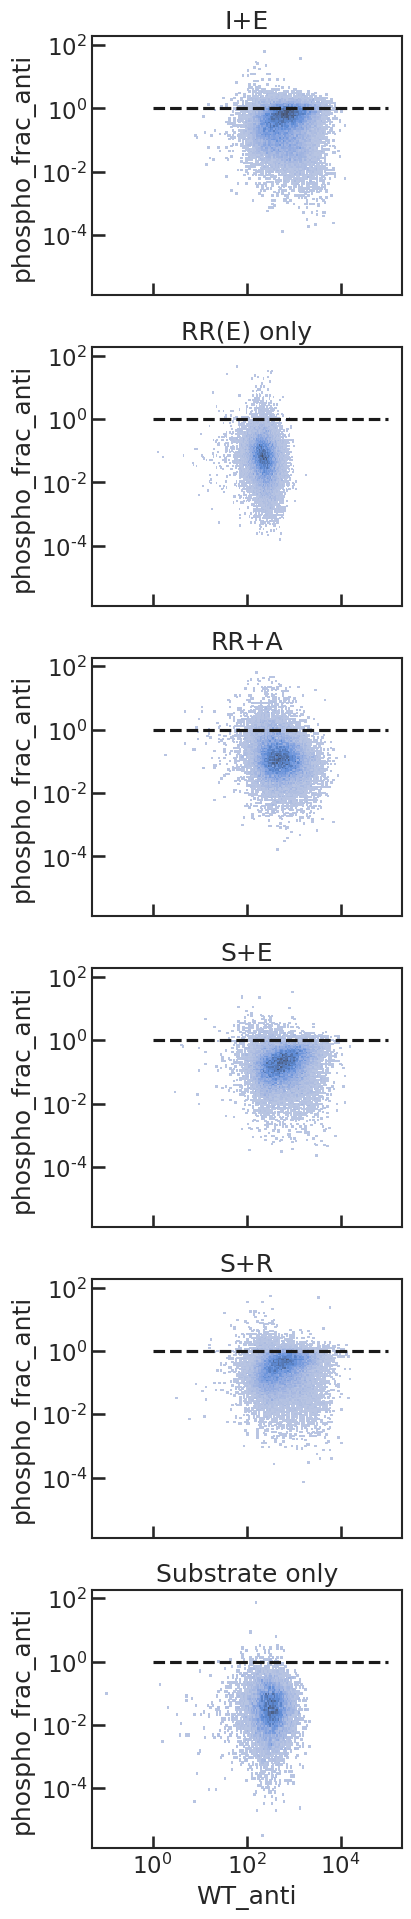

In [2]:


# dataset, construct, model
s_list = [
    ['I+E', 'I+E', 'push'],
    ['S+E', 'S+E', 'push'],
    ['S+R', 'S+R', 'push'],
    ['RR(E) only', 'RR(E) only', 'push'],
    ['RR+A', 'RR+A', 'push'],
    ['Substrate only', 'Substrate only', 'background']
         ]

df_info = pd.DataFrame(s_list, columns=['dataset', 'construct', 'model'])
     
display(df_info)

df_list = []
for index, row in df_info.iterrows():
    df = pd.read_csv("../data/push_data/{}.csv".format(row['dataset']))    
    df['dataset'] = row['dataset']    
    df_list.append(df)
    
    
df = pd.concat(df_list).drop("Unnamed: 0", axis=1, errors='ignore')


df.set_index("dataset", inplace=True, append=True)
df = df.reorder_levels(df.index.names[::-1])


df = df[(df[df.columns[:-1]] > 0).all(axis=1)].rename(columns={'Kinase': 'WT_anti', 'Substrate': 'ST_anti', 'Phosphorylation': 'SpT_anti'})

df['phospho_frac_anti'] = df['SpT_anti'] / df['ST_anti']


print(len(df.index), "/", len(df.index))

display(df)


nconstructs = df.groupby("dataset").ngroups
fig, axes = plt.subplots(nconstructs, 1, figsize=(4, 4*nconstructs),
                        sharex=True, sharey=True, squeeze=False)

for i, (construct, group) in enumerate(df.groupby("dataset")):
    
    sns.histplot(group, x='WT_anti', y='phospho_frac_anti', 
                 log_scale=(True, True), ax=axes[i, 0])
    
    axes[i, 0].hlines(1e0, xmin=1e0, xmax=1e5, color='k', linestyle='--')
    axes[i, 0].set_title(construct)

plt.show()

,Flag Antibody,GFP
0,161.696991,2374.120361
1,1240.923218,43969.449220
2,282.686981,8694.838867
3,591.710754,19131.974610
4,204.732666,5522.936523
...,...,...
13600,126.316025,4277.248535
13601,133.054901,1409.522461
13602,197.485596,12632.264650
13603,132.299561,2700.497314


,Flag Antibody,Myc Antibody,GFP,Phosphorylation
0,242.237396,10.542568,49.151424,88.289253
1,245.214203,9.105002,25.773367,69.311401
2,198.373779,113.333046,7.991207,67.203972
3,662.307495,108.429840,70.303268,108.120468
4,271.516663,19.239723,23.496510,27.236855
...,...,...,...,...
1241,381.387756,127.926117,105.715302,191.532715
1242,357.717010,29.567837,57.451740,204.941223
1243,740.799927,67.205338,3.878183,181.291016
1244,79.196342,32.619019,21.190351,126.087936


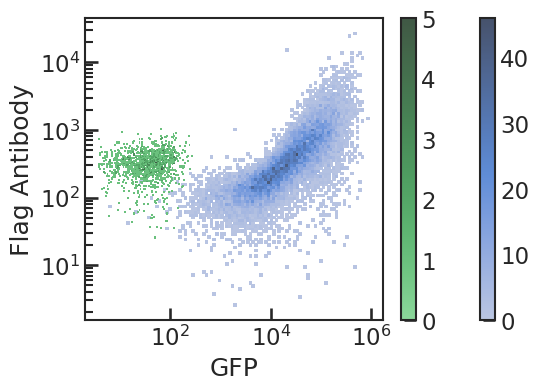

,Myc Antibody,GFP
0,3629.804688,10822.783200
1,7194.144043,81854.250000
2,1163.729858,27656.691410
3,9244.202148,51191.843750
4,1250.756348,14576.749020
...,...,...
5313,1712.819214,6483.580566
5314,74.311577,394.036224
5315,165.344238,10466.643560
5316,195.988892,1787.527344


,Flag Antibody,Myc Antibody,GFP,Phosphorylation
0,242.237396,10.542568,49.151424,88.289253
1,245.214203,9.105002,25.773367,69.311401
2,198.373779,113.333046,7.991207,67.203972
3,662.307495,108.429840,70.303268,108.120468
4,271.516663,19.239723,23.496510,27.236855
...,...,...,...,...
1241,381.387756,127.926117,105.715302,191.532715
1242,357.717010,29.567837,57.451740,204.941223
1243,740.799927,67.205338,3.878183,181.291016
1244,79.196342,32.619019,21.190351,126.087936


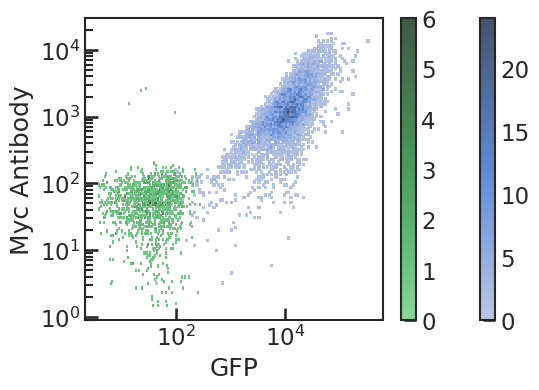

,GFP,PE Antibody
0,10822.783200,902.008240
1,81854.250000,3806.525635
2,27656.691410,840.101501
3,51191.843750,5841.779297
4,14576.749020,125.424690
...,...,...
5313,6483.580566,751.310974
5314,394.036224,123.866150
5315,10466.643560,225.664566
5316,1787.527344,146.426376


,Flag Antibody,Myc Antibody,GFP,Phosphorylation
0,242.237396,10.542568,49.151424,88.289253
1,245.214203,9.105002,25.773367,69.311401
2,198.373779,113.333046,7.991207,67.203972
3,662.307495,108.429840,70.303268,108.120468
4,271.516663,19.239723,23.496510,27.236855
...,...,...,...,...
1241,381.387756,127.926117,105.715302,191.532715
1242,357.717010,29.567837,57.451740,204.941223
1243,740.799927,67.205338,3.878183,181.291016
1244,79.196342,32.619019,21.190351,126.087936


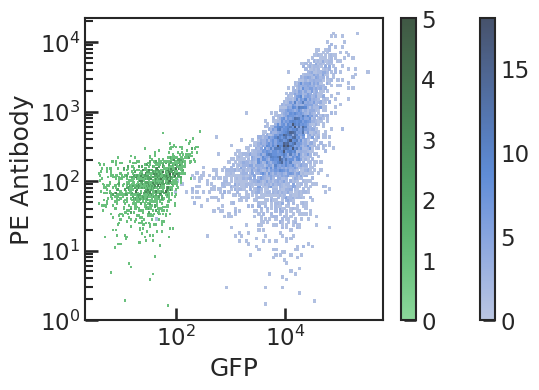

In [3]:
nbins_anti = 100
nbins_GFP = 100

nonempty_writer_noise = noise.EmpiricalNoise("../data/noise_data/Kinase Noise.csv", 
                                   'Flag Antibody', 'GFP', 
                                   nbins_anti=nbins_anti, nbins_GFP=nbins_GFP, 
                                   verbose=True)

empty_writer_noise = noise.EmpiricalNoise("../data/noise_data/Empty Cell.csv", 
                                   'Flag Antibody', 'GFP', 
                                   nbins_anti=nbins_anti, nbins_GFP=nbins_GFP, 
                                   verbose=True)

mix_writer_noise = noise.MixtureNoise(nonempty_writer_noise, empty_writer_noise)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
nonempty_writer_noise.plot(ax)
empty_writer_noise.plot(ax, color='g')
plt.show()

writer_noise = nonempty_writer_noise
    
substrate_noise = noise.EmpiricalNoise("../data/noise_data/Substrate Noise.csv", 
                                   'Myc Antibody', 'GFP', 
                                   nbins_anti=nbins_anti, nbins_GFP=nbins_GFP, 
                                   verbose=True)

empty_substrate_noise = noise.EmpiricalNoise("../data/noise_data/Empty Cell.csv", 
                                   'Myc Antibody', 'GFP', 
                                   nbins_anti=nbins_anti, nbins_GFP=nbins_GFP, 
                                   verbose=True)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
substrate_noise.plot(ax)
empty_substrate_noise.plot(ax, color='g')
plt.show()


    
phospho_noise = noise.EmpiricalNoise("../data/noise_data/PE Noise.csv", 
                                   'PE Antibody', 'GFP', 
                                   nbins_anti=nbins_anti, nbins_GFP=nbins_GFP, 
                                   verbose=True)

empty_phospho_noise = noise.EmpiricalNoise("../data/noise_data/Empty Cell.csv", 
                                   'Phosphorylation', 'GFP', 
                                   nbins_anti=nbins_anti, nbins_GFP=nbins_GFP, 
                                   verbose=True)

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
phospho_noise.plot(ax)
empty_phospho_noise.plot(ax, color='g')
plt.show()

     fun: 3.913981107523064
 message: 'Solution found.'
    nfev: 25
  status: 0
 success: True
       x: 5.9608609865491405e-06


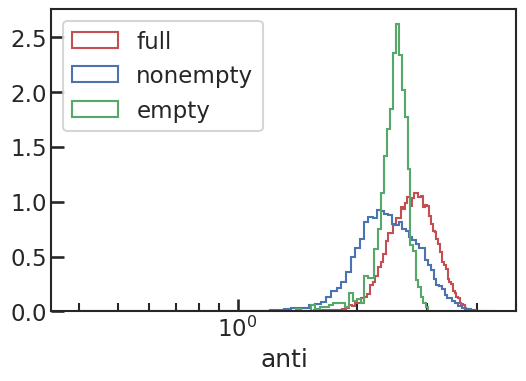

     fun: 3.4280020996539617
 message: 'Solution found.'
    nfev: 25
  status: 0
 success: True
       x: 5.9608609865491405e-06


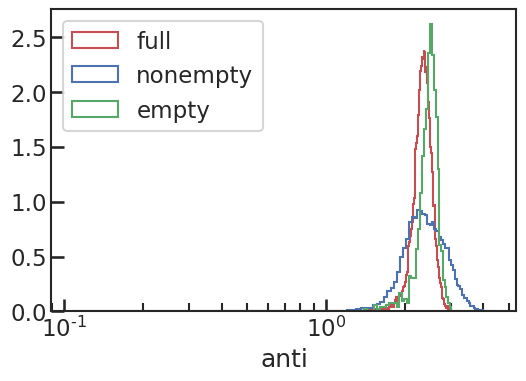

     fun: 3.7327582918795494
 message: 'Solution found.'
    nfev: 25
  status: 0
 success: True
       x: 5.9608609865491405e-06


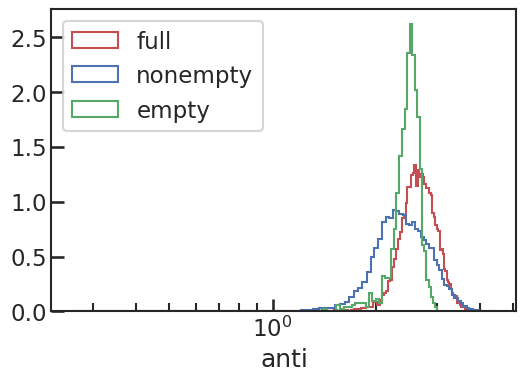

     fun: 3.8591789599220565
 message: 'Solution found.'
    nfev: 25
  status: 0
 success: True
       x: 5.9608609865491405e-06


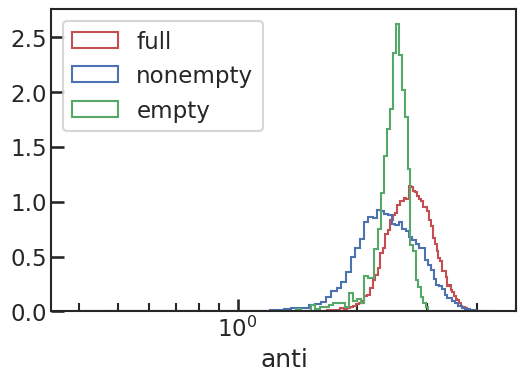

     fun: 3.8680485330668803
 message: 'Solution found.'
    nfev: 25
  status: 0
 success: True
       x: 5.9608609865491405e-06


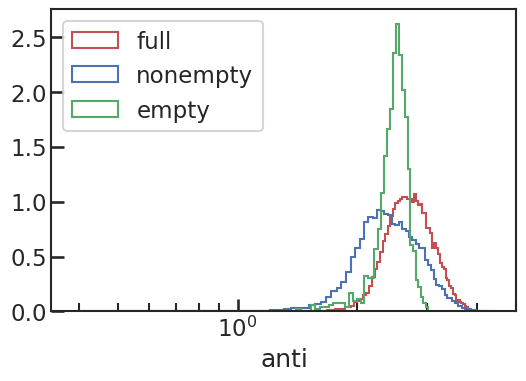

     fun: 3.577492504760788
 message: 'Solution found.'
    nfev: 25
  status: 0
 success: True
       x: 5.9608609865491405e-06


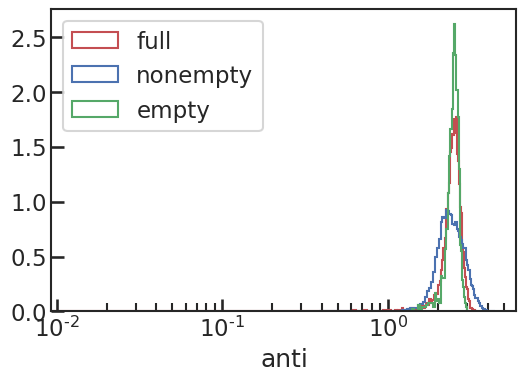

129036
123934


WT_anti       ST_anti    SpT_anti  \
dataset                                                       
I+E            0        68.960388   1129.869995  139.941193   
               1      1506.847168   1435.413818  846.210022   
               2       639.213379   3768.703125  779.674561   
               3      1000.220520   1910.076904  897.555603   
               4      1146.356323    775.257690  575.703674   
...                           ...           ...         ...   
Substrate only 13731   240.871521  12430.469730   97.595245   
               13733   470.159546  12937.257810  149.605240   
               13734   282.725586   3274.505371  216.972946   
               13735   378.135590   1688.022461   74.202393   
               13736   343.286621  14332.762700  110.619080   

                      phospho_frac_anti         WT_GFP        ST_GFP  \
dataset                                                                
I+E            0               0.123856    3517.631820   5624.513620   
               1               0.589523   87974.057381  15178.129411   
               2               0.206881   38184.152186  19897.570613   
               3               0.469905  228353.530581  34195.082913   
               4               0.742597  326552.224312  13868.334781   
...                                 ...            ...           ...   
Substrate only 13731           0.007851   10286.914452  44827.597556   
               13733           0.011564   48467.032443  77038.722214   
               13734           0.066261  179905.505341  19897.570613   
               13735           0.043958   30082.912130  12671.568702   
               13736           0.007718  202687.092129  84314.642956   

                           SpT_GFP  phospho_frac_GFP  
dataset                                               
I+E            0       4695.664981          0.834857  
               1      34195.082913          2.252918  
               2      19897.570613          1.000000  
               3       8069.761705          0.235992  
               4      37424.636908          2.698567  
...                            ...               ...  
Substrate only 13731   4695.664981          0.104749  
               13733  13868.334781          0.180018  
               13734   8069.761705          0.405565  
               13735   2990.387247          0.235992  
               13736   8069.761705          0.095710  

[123934 rows x 8 columns]

In [4]:

for dataset, group in df.groupby("dataset"):
    
#     print(dataset)
    
    frac = mix_writer_noise.calc_mixture(group['WT_anti'])
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    
    ax.hist(np.log10(group['WT_anti']), histtype='step', bins='auto', 
            label='full', density=True, color='r')
    ax.hist(np.log10(mix_writer_noise.nonempty.df['Flag Antibody']), color='b', density=True,
            histtype='step', bins='auto', label='nonempty')
    ax.hist(np.log10(mix_writer_noise.empty.df['Flag Antibody']), color='g', density=True,
            histtype='step', bins='auto', label='empty')
    
    ax.set_xlabel("anti")
    
#     x = np.concatenate([writer_noise.nonempty.df['Flag Antibody'], 
#                         writer_noise.empty.df['Flag Antibody']])
#     weights = np.concatenate([(1-frac)*np.ones_like(writer_noise.nonempty.df['Flag Antibody']),
#                              frac*np.ones_like(writer_noise.empty.df['Flag Antibody'])])
    
    
#     ax.hist(np.log10(x), weights=weights, color='m', density=True,
#             histtype='step', bins=100, label='mixture')
    
    
#     hist, bin_edges = np.histogram(np.log10(group['WT_anti']), bins='auto')
    
#     hist = hist/hist.sum()
    
#     ax.plot(10**((bin_edges[:-1]+bin_edges[1:])/2), hist, 'b', label='full')
    
#     x = writer_noise.nonempty.edges_anti
#     ax.plot(10**((x[:-1]+x[1:])/2), writer_noise.nonempty.prob_anti, 'g', label='nonempty')
#     x = writer_noise.empty.edges_anti
#     ax.plot(10**((x[:-1]+x[1:])/2), writer_noise.empty.prob_anti, 'r', label='empty')
    
    
    ax.set_xscale('log')
    ax.legend(loc='upper left')
    plt.show()

        
    df.loc[group.index, 'WT_GFP'] = writer_noise.anti_to_GFP(group['WT_anti'], plot=False)

    df.loc[group.index, 'ST_GFP'] = substrate_noise.anti_to_GFP(group['ST_anti'], plot=False)

    df.loc[group.index, 'SpT_GFP'] = phospho_noise.anti_to_GFP(group['SpT_anti'], plot=False)
    
    
df['phospho_frac_GFP'] = df['SpT_GFP'] / df['ST_GFP']


print(len(df))
df.dropna(inplace=True)
print(len(df))

display(df)

In [12]:
def solve(df, df_info, param_dict, x0, bounds, verbose=False):

    if verbose:
        start = time.time()

    def func(x):
                        
        loss = 0.0
        norm = 0.0
        
        for index, row in df_info.iterrows():
            dataset = row['dataset']
            
            construct = row['construct']
            
            df_data = df.query("dataset=='{}'".format(dataset))
            
            N_data = len(df_data.index)
            
            norm += N_data
            
            noise_params = np.array(x)[param_dict[construct][0:1]]
            model_params = 10**np.array(x)[param_dict[construct][1:]]
            
#             print(noise_params, model_params)
            
            if row['model'] == 'background':
                model = pp.Background()
                
                L = model.loss(df_data['SpT_GFP'].values, 
                                            df_data[['ST_GFP']].values,
                                            model_params, use_log=True)
                
#                 print(L)
                
                loss += N_data * L
                

            elif row['model'] == 'push':
                
                
                
#                 print(noise_params)
                
                model = pp.PushAmp()
                
                L = model.loss(df_data['SpT_GFP'].values, 
                                            df_data[['WT_GFP', 'ST_GFP']].values,
                                            model_params, use_log=True)

#                 L = model.loss_mixture(df_data['SpT_GFP'].values, 
#                                             df_data[['WT_GFP', 'ST_GFP']].values,
#                                             model_params, noise_params)

                loss += N_data * L
    
#                 print(L)
                
        loss /= norm
#         print(loss)
        return loss


    if verbose:
        print("Initial Loss:", func(x0))


    res = opt.minimize(func, x0, method='L-BFGS-B', 
                       jac='2-point', bounds=bounds, 
                       options={'iprint':101, 'eps': 1e-8, 
                                'gtol': 1e-8, 'ftol':1e-12,
                               'finite_diff_rel_step': 1e-4})
    

    if verbose:
        print("Final Loss:", res.fun)

        end = time.time()

        print("Time Elapsed", end-start, "seconds")

        print(res)
        
    
    return res

In [13]:
model_count = {'push': 0, 'background': 0}
param_dict = {}

param_labels = [r"$\rho$", r"$\log_{10}(v_{bg}^p)$", r"$\log_{10}(v_{WS}^p)$"]
x0 = [0.5, 0.0, 1.0]
bounds = [(0.0, 1.0), (None, None), (None, None)]

for index, row in df_info.iterrows():
    
    construct = row['construct']
    model = row['model']
                
    if construct not in param_dict:
        if model == 'background':
            param_dict[construct] = [0, 1]
            model_count['background'] +=1
        elif model == 'push':
            param_dict[construct] = [0, 1, 2, 3+model_count['push']]
            model_count['push'] += 1
            
            param_labels.append(construct + ": " + r"$\log_{10}(\alpha_{WS})$")
            x0.append(2.0)
            bounds.append((None, None))
        

print(param_labels)
print(param_dict)
print(model_count)

print(x0)
print(bounds)


res = solve(df, df_info, param_dict, x0, bounds, verbose=True)


['$\\rho$', '$\\log_{10}(v_{bg}^p)$', '$\\log_{10}(v_{WS}^p)$', 'I+E: $\\log_{10}(\\alpha_{WS})$', 'S+E: $\\log_{10}(\\alpha_{WS})$', 'S+R: $\\log_{10}(\\alpha_{WS})$', 'RR(E) only: $\\log_{10}(\\alpha_{WS})$', 'RR+A: $\\log_{10}(\\alpha_{WS})$']
{'I+E': [0, 1, 2, 3], 'S+E': [0, 1, 2, 4], 'S+R': [0, 1, 2, 5], 'RR(E) only': [0, 1, 2, 6], 'RR+A': [0, 1, 2, 7], 'Substrate only': [0, 1]}
{'push': 5, 'background': 1}
[0.5, 0.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0]
[(0.0, 1.0), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None), (None, None)]
Initial Loss: 19384.43505338496
Final Loss: 18638.67258121257
Time Elapsed 58.512399673461914 seconds
      fun: 18638.67258121257
 hess_inv: <8x8 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00000000e+00, -2.06058758e-03, -1.65724487e-03,  1.66114212e-08,
        1.10376277e-04,  6.85176901e-07,  2.53985152e-04, -5.33213458e-05])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 450
      

Model parameters:


$\rho$ = 0.5

$\log_{10}(v_{bg}^p)$ = -0.505167544040827

$\log_{10}(v_{WS}^p)$ = 0.46631527821434227

I+E: $\log_{10}(\alpha_{WS})$ = -6.570140098208821

S+E: $\log_{10}(\alpha_{WS})$ = -0.54570780508157

S+R: $\log_{10}(\alpha_{WS})$ = -4.725496630415114

RR(E) only: $\log_{10}(\alpha_{WS})$ = 2.553609358070823

RR+A: $\log_{10}(\alpha_{WS})$ = -3.297432072284138

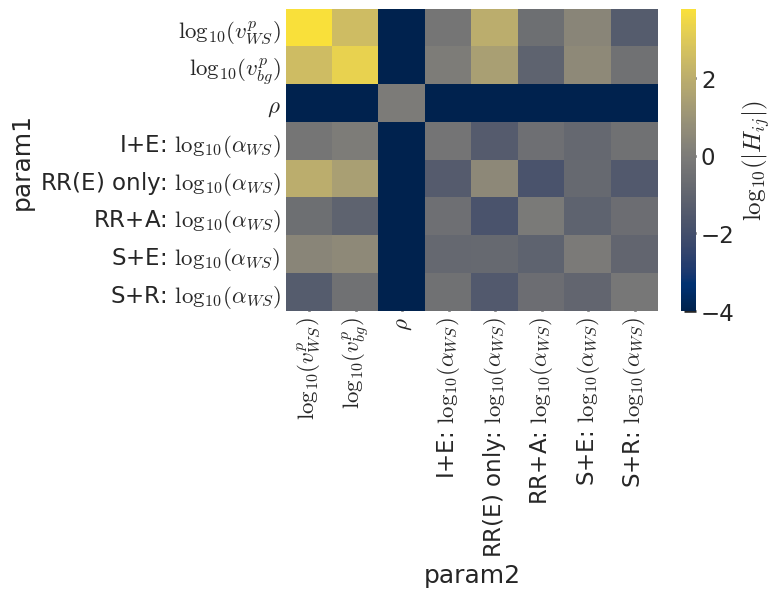

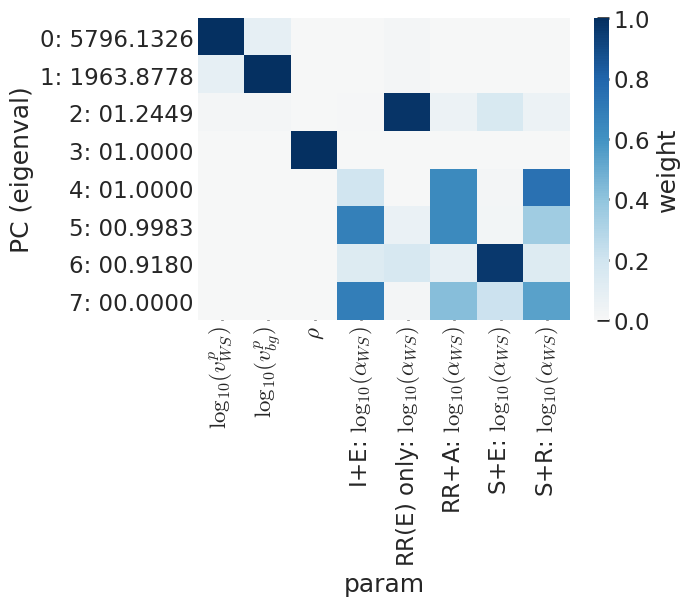

In [14]:
hess = la.inv(res.hess_inv.todense())

print("Model parameters:")
for i in range(len(res.x)):
    display(Markdown(param_labels[i] + " = " + str(res.x[i])))
    

s_list = []

for i, labeli in enumerate(param_labels):
    for j, labelj in enumerate(param_labels):
        s_list.append([labeli, labelj, np.log10(np.abs(hess[i, j])+1e-4)])

df_hess = pd.DataFrame(s_list, columns=['param1', 'param2', 'hess'])

sns.heatmap(df_hess.pivot("param1", "param2", "hess"), 
            cbar_kws={'label': r"$\log_{10}(|H_{ij}|)$"}, 
            cmap='cividis', center=0)

plt.show()

evals, evecs = la.eigh(hess)

evals = evals[::-1]
evecs = evecs[:, ::-1]

s_list = []
for i, labeli in enumerate(param_labels):
    for j in range(len(evals)):
        s_list.append([labeli, "{0:}: {1:07.4f}".format(j, evals[j]), np.abs(evecs[i, j])])
        

df_evecs = pd.DataFrame(s_list, columns=['param', "PC (eigenval)", 'val'])

sns.heatmap(df_evecs.pivot("PC (eigenval)", "param", "val"), 
            cbar_kws={'label': "weight"}, 
            cmap='RdBu', center=0)

plt.show()

In [ ]:
hess_inv = res.hess_inv.todense()

constructs = []
zippers = []


for index, row in df_info.iterrows():

    construct = row['construct']
    if row['model'] == 'push':
        
        if construct not in zippers:
            idx = param_dict[construct][3]
            
            logalpha = res.x[idx]
            
            constructs.append(construct)
            
            zippers.append((logalpha, np.sqrt(hess_inv[idx, idx])))
            

print(zippers)
            
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

y = 1/10**np.array([z[0] for z in zippers])
# y_low =  y - 10**np.array([zippers[key][0]-zippers[key][1] for key in zippers])
# y_up =  10**np.array([zippers[key][0]+zippers[key][1] for key in zippers]) - y

ax.bar(constructs, y)

ax.set_yscale('log')
ax.set_xlabel("Zipper")
ax.set_ylabel("Binding Strength\n" + r"$1/\alpha_{WS} = k^{on}/k^{off}$ [GFP]$^{-1}$")
plt.xticks(rotation=45)

plt.show()

In [16]:


for index, row in df_info.iterrows():
    
    dataset = row['dataset']
    model = row['model']
    construct = row['construct']
    
    df_data = df_data = df.query("dataset=='{}'".format(dataset))
    
    
    if model == 'push':
#         params = 10**np.array(res.x)[param_dict[construct]]
        
        noise_params = np.array(res.x)[param_dict[construct][0:1]]
        model_params = 10**np.array(res.x)[param_dict[construct][1:]]
    
        amp = pp.PushAmp()
        SpT_GFP_predict = amp.predict_all(df_data[['WT_GFP', 'ST_GFP']].values, model_params)
#         SpT_GFP_predict = amp.predict_all(np.asfortranarray(np.c_[np.zeros(len(df_data.index)), 
#                                                 df_data['ST_GFP'].values]), params)
        
    elif model == 'background':
        
        SpT_GFP_predict = np.zeros(len(df_data.index))
        
    df.loc[df_data.index, 'SpT_GFP_predict'] = SpT_GFP_predict
    
    
df['SpT_anti_predict'] = phospho_noise.GFP_to_anti(df['SpT_GFP_predict'])

df['phospho_frac_GFP_predict'] = df['SpT_GFP_predict'] / df['ST_GFP']
df['phospho_frac_anti_predict'] = df['SpT_anti_predict'] / df['ST_anti']

display(df)

WT_anti       ST_anti    SpT_anti  \
dataset                                                       
I+E            0        68.960388   1129.869995  139.941193   
               1      1506.847168   1435.413818  846.210022   
               2       639.213379   3768.703125  779.674561   
               3      1000.220520   1910.076904  897.555603   
               4      1146.356323    775.257690  575.703674   
...                           ...           ...         ...   
Substrate only 13731   240.871521  12430.469730   97.595245   
               13733   470.159546  12937.257810  149.605240   
               13734   282.725586   3274.505371  216.972946   
               13735   378.135590   1688.022461   74.202393   
               13736   343.286621  14332.762700  110.619080   

                      phospho_frac_anti         WT_GFP        ST_GFP  \
dataset                                                                
I+E            0               0.123856    3517.631820   5624.513620   
               1               0.589523   87974.057381  15178.129411   
               2               0.206881   38184.152186  19897.570613   
               3               0.469905  228353.530581  34195.082913   
               4               0.742597  326552.224312  13868.334781   
...                                 ...            ...           ...   
Substrate only 13731           0.007851   10286.914452  44827.597556   
               13733           0.011564   48467.032443  77038.722214   
               13734           0.066261  179905.505341  19897.570613   
               13735           0.043958   30082.912130  12671.568702   
               13736           0.007718  202687.092129  84314.642956   

                           SpT_GFP  phospho_frac_GFP  SpT_GFP_predict  \
dataset                                                                 
I+E            0       4695.664981          0.834857      3834.756093   
               1      34195.082913          2.252918     11597.337493   
               2      19897.570613          1.000000     15203.378192   
               3       8069.761705          0.235992     26127.851885   
               4      37424.636908          2.698567     10596.546818   
...                            ...               ...              ...   
Substrate only 13731   4695.664981          0.104749         0.000000   
               13733  13868.334781          0.180018         0.000000   
               13734   8069.761705          0.405565         0.000000   
               13735   2990.387247          0.235992         0.000000   
               13736   8069.761705          0.095710         0.000000   

                      SpT_anti_predict  phospho_frac_GFP_predict  \
dataset                                                            
I+E            0            206.908548                  0.681793   
               1            206.908548                  0.764082   
               2            206.908548                  0.764082   
               3            613.877015                  0.764082   
               4            735.865648                  0.764082   
...                                ...                       ...   
Substrate only 13731               NaN                  0.000000   
               13733               NaN                  0.000000   
               13734               NaN                  0.000000   
               13735               NaN                  0.000000   
               13736               NaN                  0.000000   

                      phospho_frac_anti_predict  
dataset                                          
I+E            0                       0.183126  
               1                       0.144146  
               2                       0.054902  
               3                       0.321389  
               4                       0.949188  
...                                         ...  
Substrate only 13731              

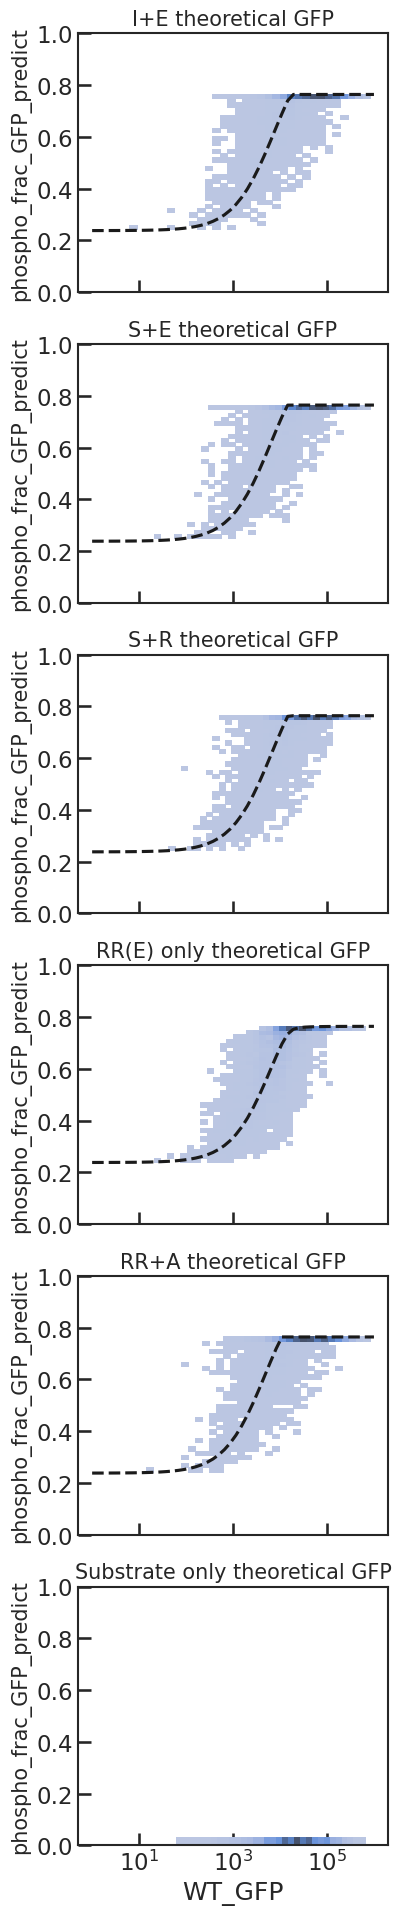

In [17]:
fig, axes = plt.subplots(len(df_info.index), 1, figsize=(4, 4*len(df_info.index)),
                        sharex=True, sharey=True, squeeze=False)


for i, row in df_info.iterrows():
    
    dataset = row['dataset']
    model = row['model']
    construct = row['construct']
    
    df_data = df_data = df.query("dataset=='{}'".format(dataset))
    
    sns.histplot(df_data, x='WT_GFP', y='phospho_frac_GFP_predict', 
                 log_scale=(True, False), ax=axes[i, 0], bins=32)
    
    axes[i, 0].set_ylabel("phospho_frac_GFP_predict", fontsize='small')
    
    axes[i, 0].set_title("{0:} {1:}".format(dataset, "theoretical GFP"), fontsize='small')
    axes[i, 0].set_ylim(0, 1.0)
    
    
    if model == 'push':
        params = 10**np.array(res.x)[param_dict[construct][1:]]
        
        ST_GFP_mean = df_data['ST_GFP'].mean()
        WT_GFP = np.logspace(0, 6, base=10)
        
        amp = pp.PushAmp()
        SpT_GFP = amp.predict_all(np.asfortranarray(np.c_[WT_GFP, ST_GFP_mean*np.ones_like(WT_GFP)]), params)
        
       
        axes[i, 0].plot(WT_GFP, SpT_GFP/ST_GFP_mean, 'k--')
    
    
    

plt.show()

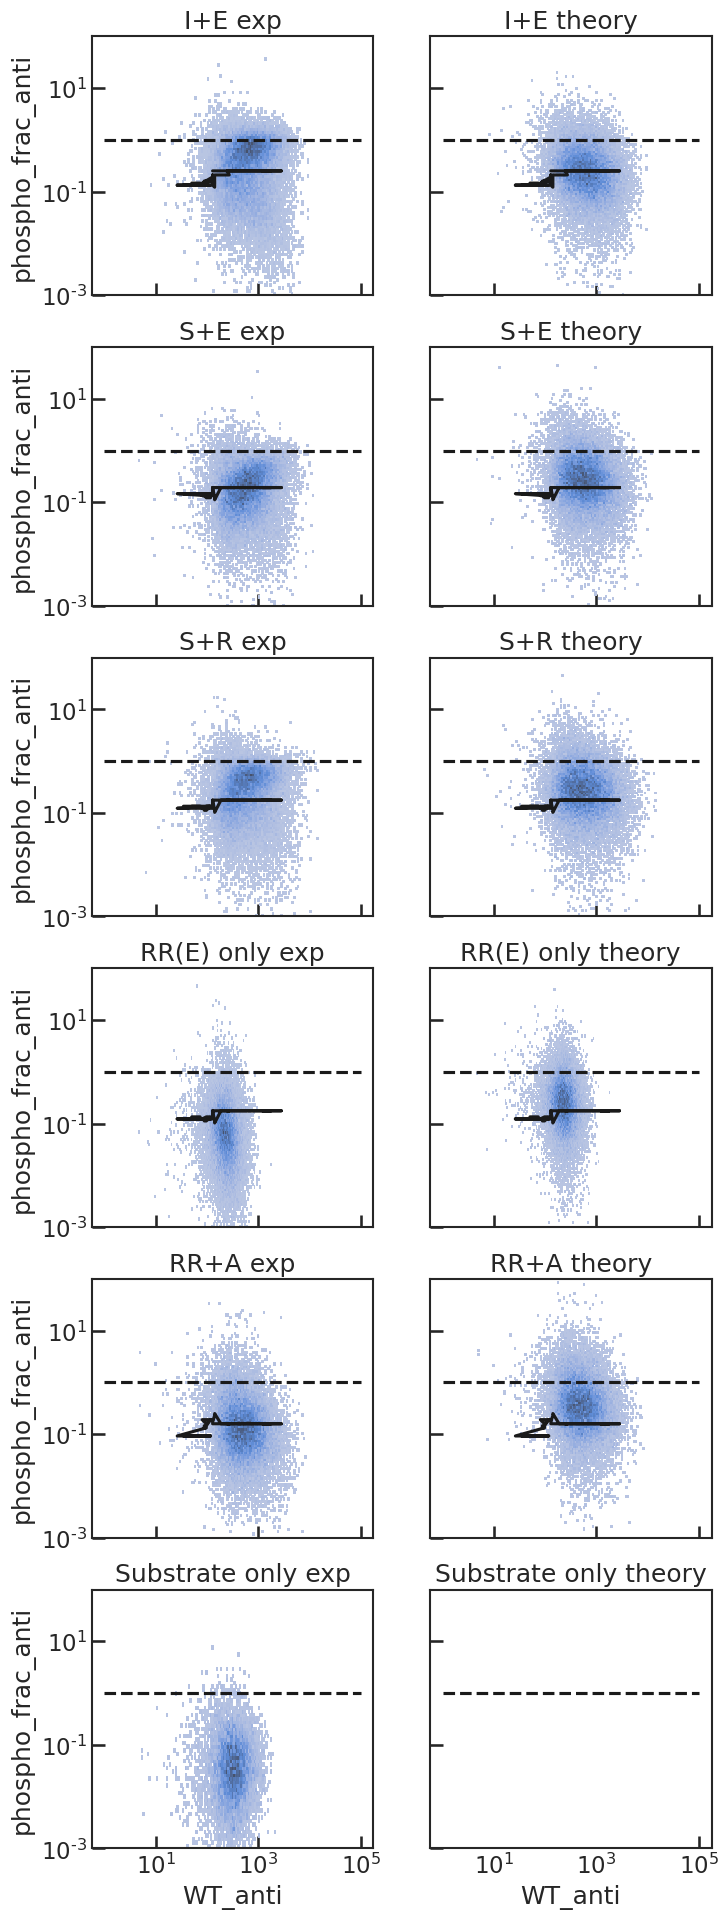

In [18]:
fig, axes = plt.subplots(len(df_info.index), 2, figsize=(8, 4*len(df_info.index)),
                        sharex=True, sharey=True, squeeze=False)

for i, row in df_info.iterrows():
    
    dataset = row['dataset']
    model = row['model']
    construct = row['construct']
    
    df_data = df.query("dataset=='{}'".format(dataset))
    
    sns.histplot(df_data, x='WT_anti', y='phospho_frac_anti', 
                 log_scale=(True, True), ax=axes[i, 0])
    sns.histplot(df_data, x='WT_anti', y='phospho_frac_anti_predict', 
                 log_scale=(True, True), ax=axes[i, 1])
    
    axes[i, 0].hlines(1e0, xmin=1e0, xmax=1e5, color='k', linestyle='--')
    axes[i, 1].hlines(1e0, xmin=1e0, xmax=1e5, color='k', linestyle='--')
    axes[i, 0].set_title("{0:} {1:}".format(dataset, "exp"))
    axes[i, 1].set_title("{0:} {1:}".format(dataset, "theory"))
    
    axes[i, 0].set_ylim(1e-3, 1e2)
    axes[i, 1].set_ylim(1e-3, 1e2)
        
    if model == 'push':
#         params = 10**np.array(res.x)[param_dict[construct]]
        noise_params = np.array(res.x)[param_dict[construct][0:1]]
        model_params = 10**np.array(res.x)[param_dict[construct][1:]]
        
        ST_GFP_mean = df_data['ST_GFP'].mean()
        WT_GFP = np.logspace(0, 6, base=10)
        
        amp = pp.PushAmp()
        SpT_GFP = amp.predict_all(np.asfortranarray(np.c_[WT_GFP, ST_GFP_mean*np.ones_like(WT_GFP)]), model_params)

        WT_anti = writer_noise.GFP_to_anti_max(WT_GFP)        
        ST_anti = substrate_noise.GFP_to_anti_max(ST_GFP_mean*np.ones_like(WT_GFP))
        SpT_anti = phospho_noise.GFP_to_anti_max(SpT_GFP)
        
        axes[i, 0].plot(WT_anti, SpT_anti/ST_anti, 'k-')
        axes[i, 1].plot(WT_anti, SpT_anti/ST_anti, 'k-')

    

plt.show()